In [5]:
import numpy.random as rm
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#1) Implement a Wright-Fisher Simulation
#create function for generating a population distribution given N population and p allele frequency 
def all_freq(size,freq):
    freq_list = []
    n = 2 * size
    p = freq / n
    while (p > 0) and (p < 1):
        freq_list.append(rm.binomial(n,p,size=None))
        p = freq_list[-1] / n
    return freq_list
#testing
#print(all_freq(100,90))

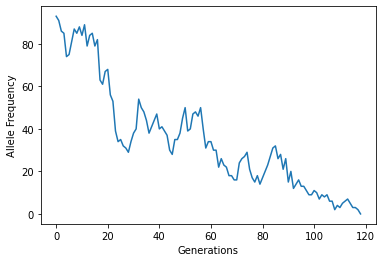

In [28]:
#2) Write a function that plots the allele frequency versus generation for the entirety of your simulation. 
#Produce such a plot for one of your simulations. Make sure you label your axes.
def plot_freq(freq_list):
    plt.plot(freq_list)
    plt.xlabel("Generations")
    plt.ylabel("Allele Frequency")
    plt.show()
#produce an example plot with 100 population and 90 allele frequency
fl1 = all_freq(100,90)
plot_freq(fl1)

(array([13., 28., 40., 51., 65., 70., 75., 53., 48., 50., 47., 31., 38.,
        38., 26., 24., 16., 28., 24., 15., 14., 23., 12., 19., 16., 11.,
        15.,  5.,  6.,  9., 12., 13.,  7.,  4.,  3.,  4.,  1.,  4.,  3.,
         2.,  3.,  1.,  1.,  0.,  3.,  2.,  2.,  0.,  1.,  1.,  2.,  2.,
         2.,  2.,  3.,  0.,  0.,  2.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  31.  ,   48.61,   66.22,   83.83,  101.44,  119.05,  136.66,
         154.27,  171.88,  189.49,  207.1 ,  224.71,  242.32,  259.93,
         277.54,  295.15,  312.76,  330.37,  347.98,  365.59,  383.2 ,
         400.81,  418.42,  436.03,  453.64,  471.25,  488.86,  506.47,
         524.08,  541.69,  559.3 ,  576.91,  594.52,  612.13,  629.74,
         647.35,  664.96,  682.57,  700.18,  717.79,  735.4 ,  753.01,
        

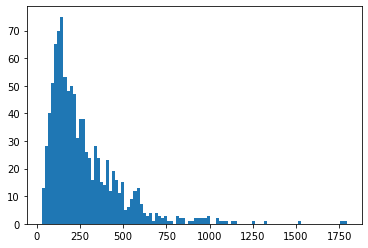

In [29]:
#3) For a starting allele frequency of 0.5, and a population size of 100, 
#produce a histogram with density showing time to fixation over (at least) 1000 trials.

fix_list = []
for i in range(1000):
    freq1 = all_freq(100,100)
    fix_list.append(len(freq1))
plt.hist(fix_list,density=False,bins=100)

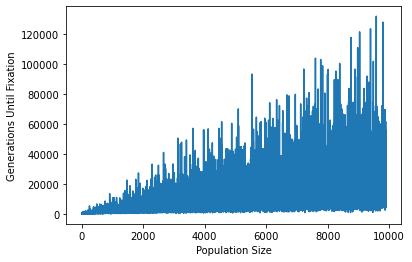

In [63]:
#4) For a starting allele frequency of 0.5, vary the population size and produce a plot 
#that shows fixation time vs (N). A reasonable range of population sizes might be 100 to 10 million.
fix_list = []
pop = 100
for i in range(100,10000):
    frequency = pop / 2
    freq1 = all_freq(pop,frequency)
    fix_list.append(len(freq1))
    pop = pop + 1
plt.plot(fix_list)
plt.xlabel("Population Size")
plt.ylabel("Generations Until Fixation")
plt.show()

Text(0.5, 0, 'Allele Frequency')

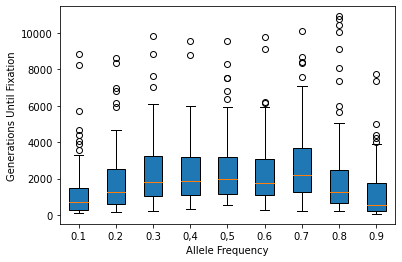

In [24]:
#5) Simulate the time to fixation under a range of different starting allele frequencies. 
#Produce a plot showing starting allele frequency vs. number of generations to fix. 
#Do (at least) 100 simulations for each and include the variability in your plot.
fix_list = []
fix_list_master = []
freq = 200
freq1 = []
for i in range(1,10,1):
    freq1 = []
    fix_list = []
    for val in range(100):
        freq1 = all_freq(1000,freq)
        fix_list.append(len(freq1))
    fix_list_master.append(fix_list)
    freq = freq + 200
labels = ['0.1','0.2','0.3','0,4','0,5','0.6','0.7','0.8','0.9']
#make boxplots
#plt.boxplot([fix_list_master[0],fix_list_master[1],fix_list_master[2],fix_list_master[3],fix_list_master[4],fix_list_master[5],fix_list_master[6],fix_list_master[7],fix_list_master[8]], vert=True, patch_artist=True, labels = labels)
plt.boxplot(fix_list_master, vert=True, patch_artist=True, labels = labels)
plt.ylabel("Generations Until Fixation")
plt.xlabel("Allele Frequency")

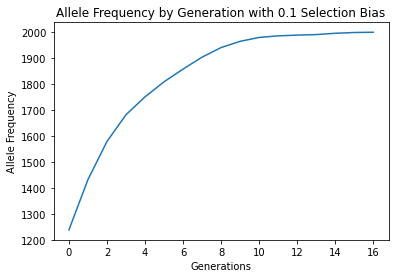

In [70]:
#6) Introduce selection to your function from Part 1 (as an additional parameter that can be specified) 
#and plot the allele frequency trajectory for some chosen parameters. 
#On your plot, make sure you note what your selection coefficient for the simulation was. 
#New function with selection
def sel_freq(size,freq,sel):
    freq_list = []
    n = 2 * size
    p = ((freq * (1+sel)) / (n - freq + (freq * (1 + sel))))
    while (p > 0) and (p < 1):
        freq_list.append(rm.binomial(n,p,size=None))
        p = ((freq_list[-1] * (1+sel)) / (n - freq_list[-1] + (freq_list[-1] * (1 + sel))))
    return freq_list

#produce an example plot with 100 population and 90 allele frequency, with selection 0.1
fl1 = sel_freq(1000,1000,0.5)

plt.plot(fl1)
plt.xlabel("Generations")
plt.ylabel("Allele Frequency")
plt.title("Allele Frequency by Generation with 0.1 Selection Bias")
plt.show()


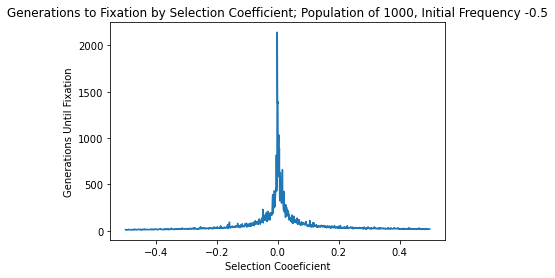

In [64]:
#Additionally, plot selection coefficient vs time to fixation for a fixed population size of your choice. 
#On your plot, make sure you note what your population size was.
fix_list = []
sel = -0.5
for i in range(-500,500,1):
    sel = i/1000
    freq1 = sel_freq(1000,1000,sel)
    fix_list.append(len(freq1))
xaxis = np.arange(-0.5,0.5,0.001)
plt.plot(xaxis,fix_list)
plt.xlabel("Selection Cooeficient")
plt.ylabel("Generations Until Fixation")
plt.title("Generations to Fixation by Selection Coefficient; Population of 1000, Initial Frequency -0.5")
plt.show()